In [1]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D , Dropout , Dense
from keras.applications.inception_v3 import InceptionV3 , preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#base_model = InceptionV3(input_shape=(90, 120, 3),weights='imagenet', include_top=False)
base_model = InceptionV3(input_shape=(90, 120, 3),weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 6s 0us/step


In [7]:
CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 90, 120, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 44, 59, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 44, 59, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 44, 59, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    preprocessing_function=preprocess_input,
#                                    rotation_range=15,
#                                    width_shift_range=0.1,
#                                    height_shift_range=0.1,
#                                    shear_range=0.5,
#                                    zoom_range=[0.8, 2.0],
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest')

# train_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

validate_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [12]:
save_path = 'D:/mask_data/split/'

train_generator = train_datagen.flow_from_directory(save_path+'train/',
                                                  batch_size=10,
                                                  class_mode='categorical',
                                                   target_size=(90,120))

validation_generator = validate_datagen.flow_from_directory(save_path+'validate/',
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                       target_size=(90,120))

test_generator = test_datagen.flow_from_directory(save_path+'test/',
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                       target_size=(90,120))

Found 2800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [13]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=280,
  epochs=20,
  validation_steps=80,
  verbose=1
)

Epoch 1/20
280/280 [==============================] - 62s 222ms/step - loss: 0.7955 - accuracy: 0.7375 - val_loss: 0.6364 - val_accuracy: 0.7950
Epoch 2/20
280/280 [==============================] - 65s 232ms/step - loss: 0.4974 - accuracy: 0.8389 - val_loss: 0.8934 - val_accuracy: 0.7937
Epoch 3/20
280/280 [==============================] - 53s 190ms/step - loss: 0.4138 - accuracy: 0.8718 - val_loss: 0.6819 - val_accuracy: 0.8238
Epoch 4/20
280/280 [==============================] - 57s 202ms/step - loss: 0.4062 - accuracy: 0.8736 - val_loss: 0.3341 - val_accuracy: 0.8637
Epoch 5/20
280/280 [==============================] - 54s 193ms/step - loss: 0.3703 - accuracy: 0.8900 - val_loss: 0.5267 - val_accuracy: 0.8487
Epoch 6/20
280/280 [==============================] - 56s 199ms/step - loss: 0.3634 - accuracy: 0.8954 - val_loss: 0.5013 - val_accuracy: 0.8450
Epoch 7/20
280/280 [==============================] - 59s 210ms/step - loss: 0.3885 - accuracy: 0.8868 - val_loss: 0.7342 - val_ac

In [14]:
model.evaluate(test_generator)

40/40 [==============================] - 9s 234ms/step - loss: 0.2768 - accuracy: 0.9150


[0.27676743268966675, 0.9150000214576721]

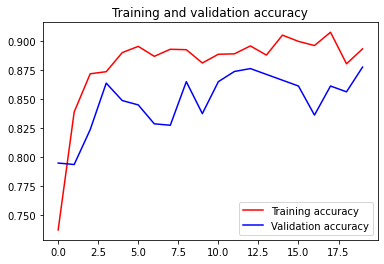

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig = plt.gcf()
fig.savefig('from_Inception.png',dpi=fig.dpi)
plt.show()



In [17]:
from keras.models import load_model

model.save('from_InceptionV3.h5')
model.save_weights('from_InceptionV3_weights.h5')